<a href="https://colab.research.google.com/github/Alexandre77777/python_programming/blob/main/7.%20%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D0%B2%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №9. Ансамблевые методы в машинном обучении**

## **Задание №1: Классификация лиц из набора данных Olivetti Faces с помощью алгоритмов градиентного бустинга**

В этом задании мы применим несколько популярных алгоритмов градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoosting из библиотеки scikit-learn для решения задачи классификации лиц из набора данных Olivetti Faces. Цель - определить, какому человеку принадлежит новое изображение лица, на основе обучения на размеченных данных.





Шаги выполнения задания:

1. Загрузите набор данных Olivetti Faces с помощью функции `fetch_olivetti_faces()` из scikit-learn.

2. Разделите данные на обучающую и тестовую выборки с помощью `train_test_split()`.

3. Выполните предобработку изображений:
   - Преобразуйте изображения в вектора признаков (flatten)
   - Нормализуйте значения пикселей (разделите на 255)

4. Создайте и обучите модели градиентного бустинга:
   - CatBoostClassifier
   - LGBMClassifier
   - XGBClassifier
   - GradientBoostingClassifier

5. Оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

6. Сравните точность и время обучения разных алгоритмов. Определите, какой из них лучше подходит для данной задачи.

7. Сделайте выводы о сравнительной эффективности разных алгоритмов градиентного бустинга для классификации лиц.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

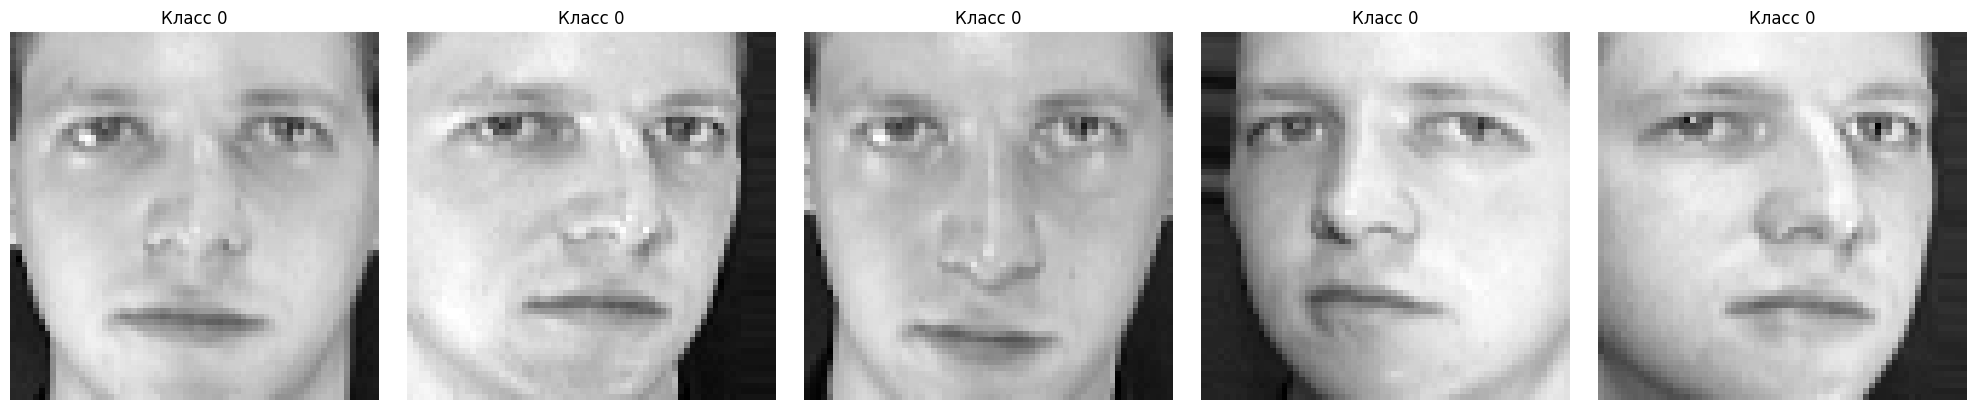

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Ваш код

## **Задание №2: Предсказание нижней половины лица по верхней с помощью алгоритмов градиентного бустинга**




- В этом задании мы применим алгоритмы градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoostingRegressor - для решения интересной задачи регрессии на датасете лиц Olivetti Faces. Цель - предсказать значения пикселей нижней половины лица по пикселям верхней половины.

- Каждое изображение лица представляет собой матрицу 64x64 в оттенках серого. Мы разделим изображения на верхнюю и нижнюю половины и будем предсказывать значения яркости пикселей нижней половины по значениям верхней.

- Сравним качество (по метрике R^2) и время обучения разных реализаций градиентного бустинга на этой задаче восстановления изображений. Посмотрим, насколько хорошо алгоритмы бустинга смогут достроить нижнюю часть лица по верхней.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

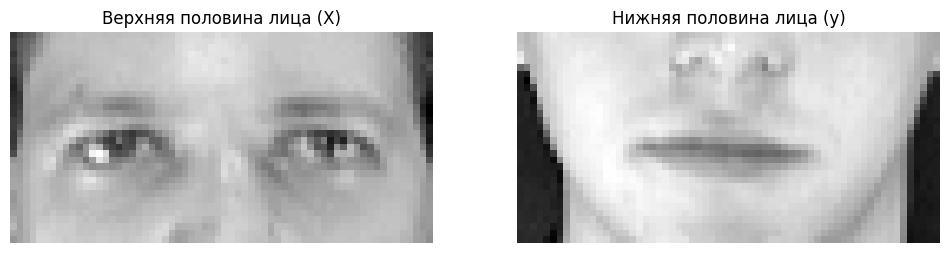

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
n_samples = images.shape[0]

# Разделение изображений на верхнюю и нижнюю половины
upper_half = images[:, :32, :]  # Верхняя половина (первые 32 строки)
lower_half = images[:, 32:, :]  # Нижняя половина (последние 32 строки)

# Преобразование 2D изображений в 1D векторы
X = upper_half.reshape((n_samples, -1))
y = lower_half.reshape((n_samples, -1))

# Выбор одного примера для отображения
sample_index = 0  # Измените значение для выбора другого изображения

# Восстановление изображений из векторов
upper_face = X[sample_index].reshape(32, 64)
lower_face = y[sample_index].reshape(32, 64)

# Отображение верхней и нижней половин лица
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(upper_face, cmap='gray')
axes[0].set_title('Верхняя половина лица (X)')
axes[0].axis('off')

axes[1].imshow(lower_face, cmap='gray')
axes[1].set_title('Нижняя половина лица (y)')
axes[1].axis('off')

plt.show()

In [ ]:
# Ваш код

## **Задание №3: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов VotingClassifier**



- В этом задании мы применим ансамблевый метод классификации VotingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. VotingClassifier объединяет предсказания нескольких базовых классификаторов путем голосования, что позволяет улучшить качество классификации по сравнению с отдельными моделями

- Мы будем использовать несколько "слабых" классификаторов, таких как LogisticRegression, DecisionTreeClassifier и KNeighborsClassifier, NaiveBayes и объединим их в ансамбль с помощью VotingClassifier. Затем сравним точность ансамбля с отдельными базовыми моделями и оценим эффект от их комбинирования.



- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

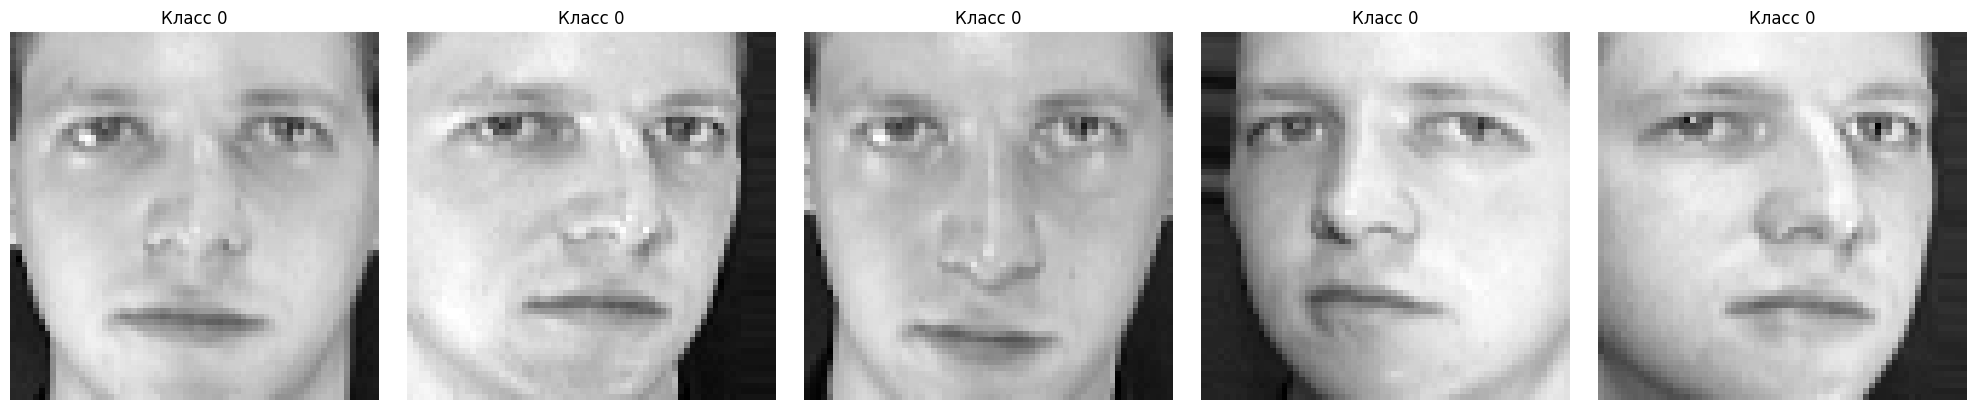

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Ваш код

## **Задание №4: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов** [**StackingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)



- В этом задании мы применим ансамблевый метод классификации StackingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. StackingClassifier объединяет предсказания нескольких базовых классификаторов путем обучения метаклассификатора на их выходах, что позволяет улучшить качество классификации по сравнению с отдельными моделями и методом голосования VotingClassifier.


- Мы будем использовать несколько "слабых" классификаторов первого уровня, таких как LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier и GaussianNB. Затем мы обучим метаклассификатор второго уровня (например, LogisticRegression или SVC) на выходах классификаторов первого уровня. Метаклассификатор будет учиться комбинировать предсказания базовых моделей оптимальным образом.




- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

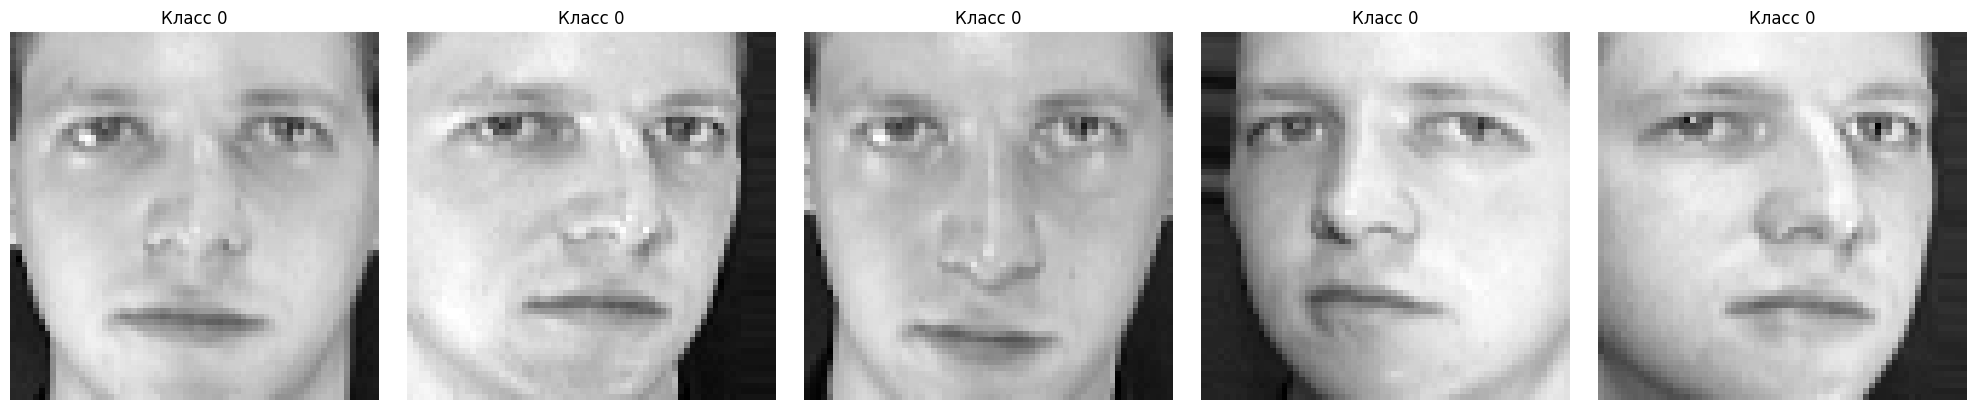

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Ваш код